## Readmission Dataset: Exploratory Data Analysis¶
    Here, I will be analysing the Readmission dataset. This is a supervised classification dataset. 
    Variables could be categorical or numerical. There are different statistical and visualization techniques of investigation for each type of variable.
    Below are the questions that i will be addressing via exploratory analysis, which will give us more insight into the dataset:
    What age range,gender, were most readmitted?
    Does Weight contribute to readmission?
    what factors helped reduce Readmission?
    How does time in hospital relate to readmission?

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [41]:
# Loading Dataset
readmission=pd.read_csv("diabetic_data.csv")

In [42]:
#I observed some variables, they don't hold much information in our case,removing them will not affect our analysis
readmission=readmission.drop(columns=[ 'admission_type_id','discharge_disposition_id','admission_source_id'
                           ,'encounter_id','patient_nbr'])

In [43]:
#peeping into readmission dataset
readmission.head(n=4)

,race,gender,age,weight,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,1,?,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,3,?,?,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,2,?,?,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,2,?,?,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [45]:
readmission=readmission.replace('?',np.nan)

In [46]:
#peeping into readmission dataset
readmission.head(n=4)

,race,gender,age,weight,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,1,NaN,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,3,NaN,NaN,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,2,NaN,NaN,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,2,NaN,NaN,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [47]:
# checking the datatypes available again
readmission.dtypes.head(n=6)

race                object
gender              object
age                 object
weight              object
time_in_hospital     int64
payer_code          object
dtype: object

In [98]:
readmission.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


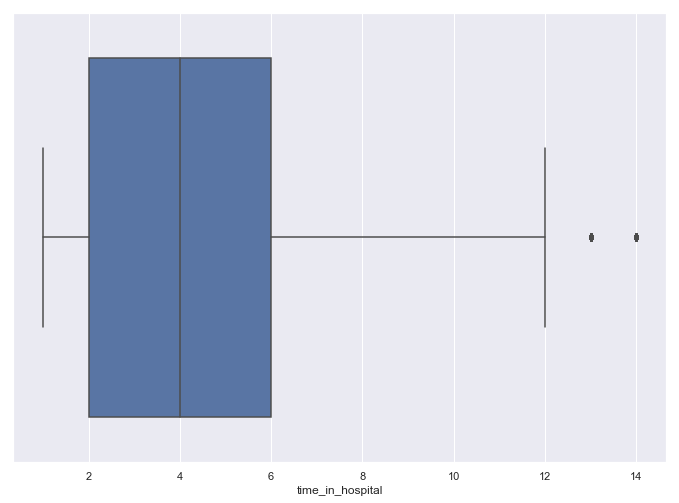

In [97]:
ax = sns.boxplot(readmission["time_in_hospital"])

The table above describe all numerical variables.; Comparing mean and 50% percentile will give hint if data are skewed or not.

## What age range,gender, were most readmitted?
>   Let's look at some personal information about the passengers as related.

In [112]:
readmitted=readmission[readmission.readmitted=='<30']
readmission_age_class=readmitted[['age','readmitted']].groupby(['age']).count().reset_index()
readmission_age_class

,age,readmitted
0,[0-10),3
1,[10-20),40
2,[20-30),236
3,[30-40),424
4,[40-50),1027
5,[50-60),1668
6,[60-70),2502
7,[70-80),3069
8,[80-90),2078
9,[90-100),310


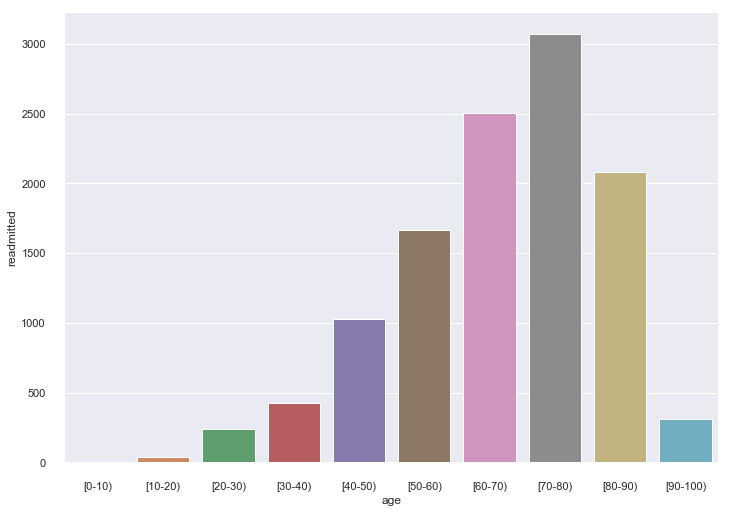

In [113]:
sns.barplot(x='age',y='readmitted',data=readmission_age_class)
sns.despine(offset=10, trim=True)
plt.show()

>   The above table and graph shows how readmission increases as age increases,the graph also shows that more readmissions occurs between age 60 and 90.

>   Let's compare age frequencies accross all categories of readdmission variable, this will give us hint about relationship between age and readmission.


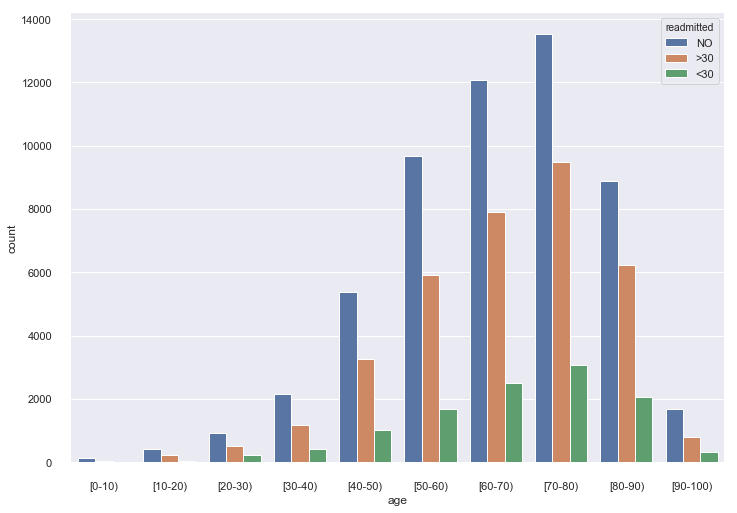

In [114]:
# create a countplot
#Categorical vs Categorical
sns.countplot(x='age',data=readmission,hue = 'readmitted')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plot
plt.show()

>  Above new graph shows more insight, overall the frequency of 'NO' readmission is far more than  >30 & <30  days 
    readmission frequencies.
    
>  Nevertheless, the graph shows that patients of age range 50 and 90 visits hospital/clinic more than other age ranges 


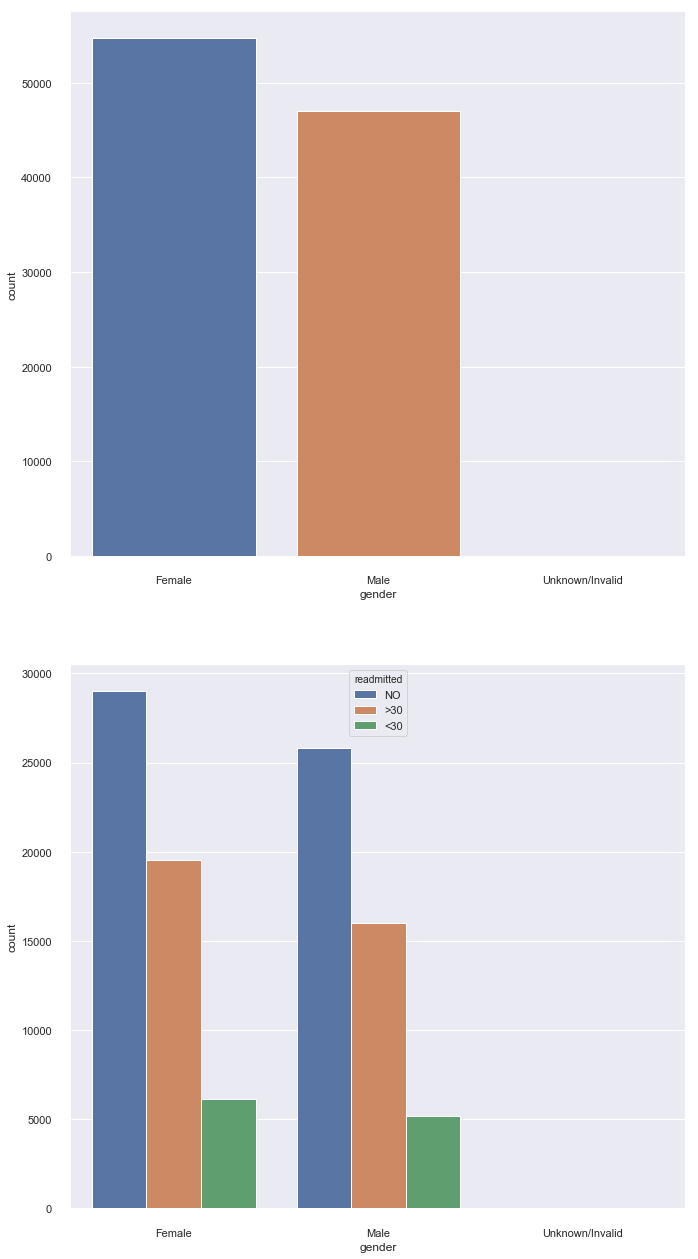

In [159]:
f,axarr=plt.subplots(2,1,figsize=(11,22))
sns.countplot(x='gender',data=readmission,ax=axarr[0])
sns.countplot(x='gender',data=readmission,hue = 'readmitted',ax=axarr[1])
sns.despine(offset=10, trim=True)
plt.show()

>  Generally, more numbers of female appeared to be readmitted than men, but when we calculate percentage of the gender readmissions, the female readmissions is not much higher than that of men, as shown in the figures below.    


            gender readmitted  readmitted_count_pct
0           Female        <30             11.245156
1           Female        >30             35.676683
2           Female         NO             53.078160
3             Male        <30             11.061524
4             Male        >30             34.060142
5             Male         NO             54.878334
6  Unknown/Invalid         NO            100.000000


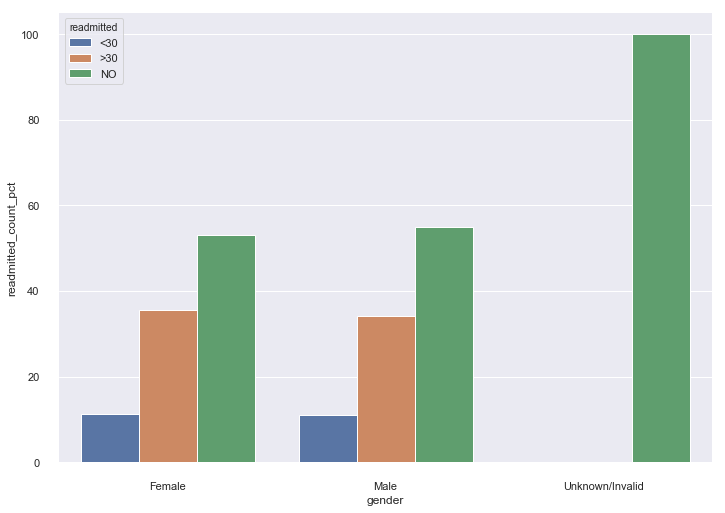

In [209]:
readmission_gender_class = readmission.groupby(['gender','readmitted']).agg({'readmitted': 'count'}).rename(columns={'readmitted':'readmitted_count_pct'})#.reset_index()
readmission_gender_class_pcts = readmission_gender_class.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).reset_index()
print(readmission_gender_class_pcts)

sns.barplot(x='gender',y='readmitted_count_pct',data=readmission_gender_class_pcts,hue='readmitted')
sns.despine(offset=10, trim=True)
plt.show()

## Does Weight contribute to readmission?
>  By the way weight is already converted to categorical data type via binning, so i will be investigating how weight affect readmission
    
     

In [247]:
#Bivariate  analysis
#weight (categorical) vs readmitted (categorical)
from scipy.stats import chi2_contingency
contingency = pd.crosstab(readmission['weight'],readmission['readmitted'])
contingency.sort_values(by=['<30'], ascending=False)

readmitted,<30,>30,NO
weight,,,
[75-100),153,663,520
[50-75),105,389,403
[100-125),67,292,266
[125-150),12,69,64
[0-25),8,31,9
[25-50),8,42,47
[150-175),3,16,16
[175-200),1,5,5
>200,0,3,0


>  Based on the dataset,number of <30 readmission are high for weight range from 50 to 150.